In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [3]:
#Create a path to where your data is stored.
path = r'/Users/amyzhang/Desktop/CF_ML_ClimateWins/Data Sets'

In [5]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'DATASET.csv'))
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

In [7]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [9]:
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [11]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

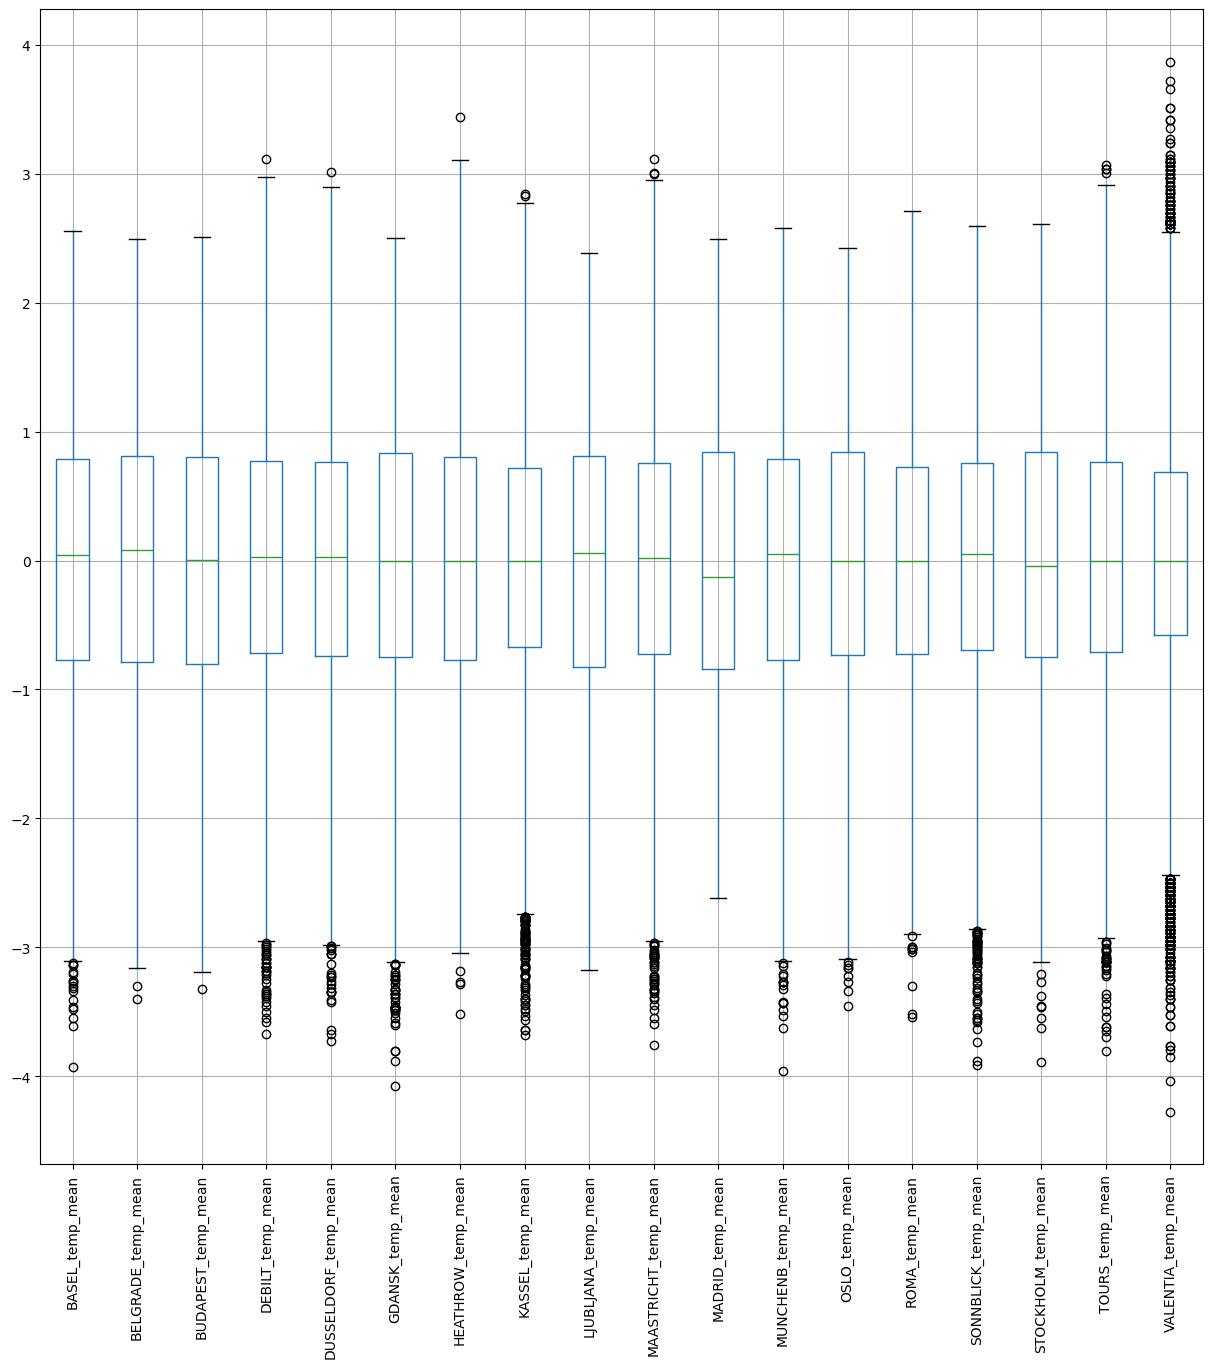

In [13]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

plt.show()

In [15]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('2019')] #<-----INSERT YEAR HERE
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
21550  20190101      1        -0.732333           -1.232510   
21551  20190102      1        -0.963204           -1.107669   
21552  20190103      1        -1.452108           -1.527588   
21553  20190104      1        -1.424946           -1.856713   
21554  20190105      1        -1.126172           -1.731872   
...         ...    ...              ...                 ...   
21910  20191227     12        -0.487881           -1.084971   
21911  20191228     12        -0.908881           -1.209812   
21912  20191229     12        -1.520011           -1.368700   
21913  20191230     12        -1.343462           -1.607032   
21914  20191231     12        -1.357043           -1.538937   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21550           -1.052110         -0.367511             -0.562362   
21551           -0.993293         -0.731423             -0.989434   
21552           -1.475592         -0.952934             -1.048340   
21553           -1.534409         -0.778890             -1.151427   
21554           -1.216797         -0.478267             -0.709628   
...                   ...               ...                   ...   
21910           -0.863895         -1.063690             -0.945254   
21911           -1.110927         -1.601646             -1.490139   
21912           -1.287378         -1.395957             -1.225060   
21913           -1.299141         -0.858001             -0.901074   
21914           -1.063873         -0.921290             -1.269240   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21550         -0.352125           -0.595665         -0.005705   
21551         -0.786929           -1.084860         -0.005705   
21552         -0.953178           -1.102331         -0.005705   
21553         -0.978754           -1.434286         -0.005705   
21554         -0.607892           -1.259573         -0.005705   
...                 ...                 ...               ...   
21910         -0.595104           -0.648078         -0.005705   
21911         -0.722987           -0.543251         -0.005705   
21912         -0.799717           -0.438423         -0.005705   
21913         -0.556739           -0.822791         -0.005705   
21914         -0.237030           -0.717963         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21550            -1.031772             -0.592185         -1.123071   
21551            -1.043881             -1.042277         -1.203946   
21552            -1.104426             -1.042277         -1.028718   
21553            -1.395042             -1.147298         -1.217425   
21554            -1.479805             -0.757219         -1.284820   
...                    ...                   ...               ...   
21910            -0.934900             -0.697206         -0.813052   
21911            -1.213407             -1.237316         -0.907406   
21912            -1.467696             -1.357341         -0.961322   
21913            -1.576677             -0.772222         -1.069155   
21914            -1.334497             -1.087286         -1.096113   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21550           -0.617629       -0.210845       -0.000746   
21551           -1.082622       -0.659834       -0.000746   
21552           -1.371671       -0.659834       -0.000746   
21553           -1.271132       -0.502081       -0.000746   
21554           -1.132891       -0.380732       -0.000746   
...                   ...             ...             ...   
21910           -0.667898       -1.375790       -0.000746   
21911           -1.145458       -0.926801       -0.000746   
21912           -1.333969       -0.247249       -0.000746   
21913           -1.132891       -0.113766       -0.000746   
21914           -0.755870       -0.647699       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
21

In [17]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   2.019067e+07    6.526027         0.170502            0.282088   
std    3.454755e+02    3.452584         0.976797            0.942994   
min    2.019010e+07    1.000000        -1.669398           -1.924808   
25%    2.019040e+07    4.000000        -0.555784           -0.404022   
50%    2.019070e+07    7.000000         0.096087            0.333672   
75%    2.019100e+07   10.000000         0.897346            1.003272   
max    2.019123e+07   12.000000         2.540605            2.070092   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean             0.269420          0.184273              0.169048   
std              0.963701          0.942226              0.986419   
min             -1.699097         -1.997201             -2.093931   
25%             -0.463939         -0.525734             -0.577088   
50%              0.206575          0.091333              0.026704   
75%              1.053540          0.914089              0.895575   
max              2.100483          2.970979              3.016209   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000      3.650000e+02   
mean           0.244828            0.172018     -5.705221e-03   
std            0.910151            0.975865      4.777038e-17   
min           -2.027399           -2.028309     -5.705221e-03   
25%           -0.480009           -0.595665     -5.705221e-03   
50%            0.121044            0.068244     -5.705221e-03   
75%            1.016229            0.976750     -5.705221e-03   
max            2.282276            3.073302     -5.705221e-03   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean              0.224877              0.194509          0.163277   
std               0.960609              0.968814          1.025720   
min              -1.782530             -2.047481         -1.743109   
25%              -0.474758             -0.562179         -0.718699   
50%               0.154910              0.127961         -0.044744   
75%               1.075195              0.908120          0.912271   
max               2.225550              3.113568          2.354534   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000    3.650000e+02   
mean             0.250347        0.105426   -7.461638e-04   
std              0.938443        0.914662    4.559900e-18   
min             -1.685856       -2.067477   -7.461638e-04   
25%             -0.479388       -0.587025   -7.461638e-04   
50%              0.199251        0.007583   -7.461638e-04   
75%              0.953293        0.941966   -7.461638e-04   
max              2.360839        2.288935   -7.461638e-04   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.190690             0.156688         0.244511   
std               1.031892             0.920464         0.997437   
min              -2.508221            -1.747095        -1.731958   
25%              -0.533833            -0.540359        -0.476948   
50%               0.080421             0.031908         0.087807   
75%               1.104177             0.927629         0.934939   
max               2.464311             2.271212         3.037082   

       VALENTIA_temp_mean  
count        3.650000e+02  
mean        -7.287352e-03  
std          4.603327e-17  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03

In [19]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

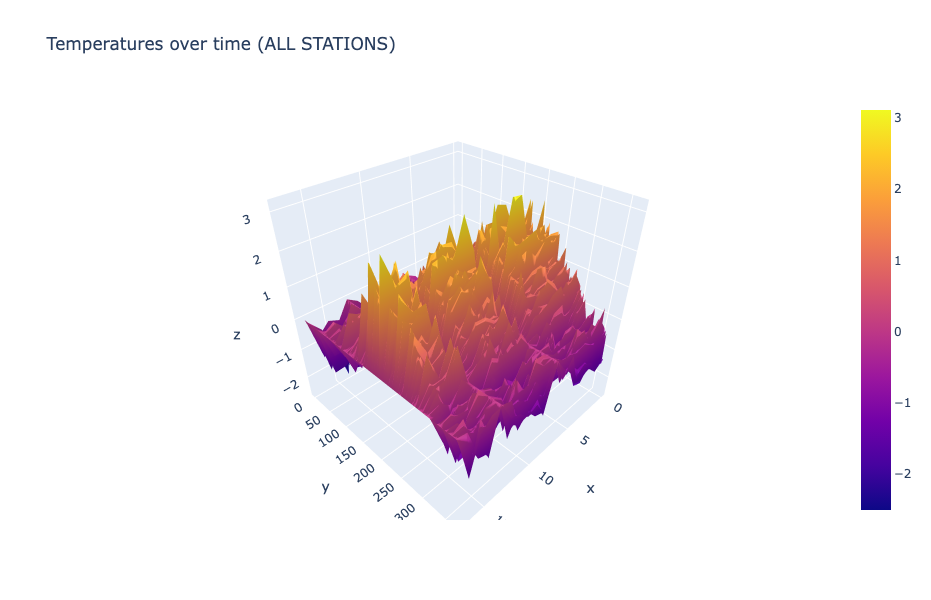

In [21]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time (ALL STATIONS)', autosize=False,
                  width=600, height=600)
fig.show()

In [23]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [25]:
n_rows = dfyear.shape[0]
n_rows

365

In [27]:
dfyear['MAASTRICHT_temp_mean'].shape

(365,)

# Weatherstation 1: MAASTRICHT

# 🚧 Step 1: Set Up Your Feature Matrix and Target


In [29]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['MAASTRICHT_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [31]:
X.shape, y.shape

((365, 2), (365, 1))

In [33]:
print("First 5 rows of X:\n", X[:5])  
print("First 5 values of y:\n", y[:5])


First 5 rows of X:
 [[1.   0.01]
 [1.   0.02]
 [1.   0.03]
 [1.   0.04]
 [1.   0.05]]
First 5 values of y:
 [[-0.59218505]
 [-1.04227652]
 [-1.04227652]
 [-1.14729787]
 [-0.75721859]]


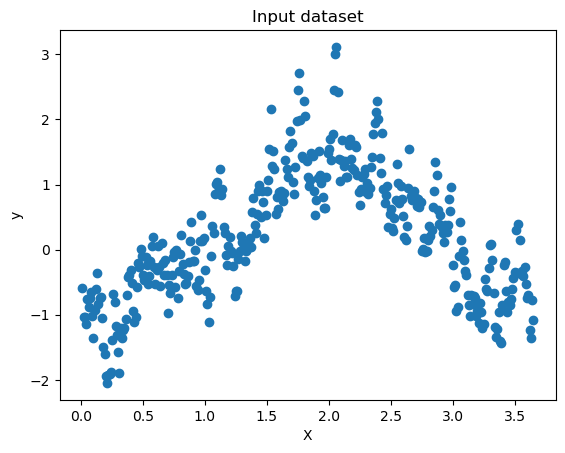

In [35]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['MAASTRICHT_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [37]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['MAASTRICHT_temp_mean'].min()

-2.047480806571673

In [39]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['MAASTRICHT_temp_mean'].max()

3.113568051117448

# ✅ 1. Prediction Function

In [41]:
def predict(X, theta):
    return X @ theta


# ✅ 2. Cost Function (Loss Function)

In [43]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost


# ✅ 3. Gradient Descent

In [45]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    
    J_history = []
    theta0_history = []
    theta1_history = []
    
    for i in range(num_iters):
        predictions = predict(X, theta)
        error = predictions - y
        gradients = (1 / m) * (X.T @ error)
        theta -= alpha * gradients
        
        # Save history for plotting
        J_history.append(compute_cost(X, y, theta))
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
    
    return theta, J_history, theta0_history, theta1_history


# ✅ 4. Feature Matrix Setup (Step 1)
Make sure index and dfyear line up:

In [47]:
# Day indices, reshaped
index = np.arange(0.01, 3.66, 0.01).reshape(-1, 1)  # shape should be (365, 1)
ones = np.ones_like(index)  # same shape as index

X = np.hstack([ones, index])  # shape (365, 2)
y = dfyear['MAASTRICHT_temp_mean'].values.reshape(-1, 1)  # shape (365, 1)


### ⚠️ NOTE: Reset and Reshape Feature Matrix Before Gradient Descent

Always **explicitly re-define and reshape your feature matrix `X` and target vector `y`** before running Gradient Descent.

This ensures that:

* The shapes of `X` and `y` match (e.g., `(365, 2)` and `(365, 1)`)
* Any previous transformations or overwrites in earlier cells don’t carry over unintended values
* You're working with a clean, numerical matrix (not mixed types from a DataFrame)

Even if you've defined `X` earlier in the notebook, **recreate it with `np.hstack` or similar methods** right before passing it into `gradient_descent()`.

> This avoids subtle shape mismatches or data issues that can silently break your model training.

---

# ✅ 5. Run Gradient Descent

In [49]:
theta_init = np.array([[1.0], [1.0]])
alpha = 0.01
iterations = 1000

theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init, alpha, iterations)


In [75]:
print("Final θ₀:", theta[0][0])
print("Final θ₁:", theta[1][0])
print("Final loss:", J_history[-1])


Final θ₀: -0.05866672221581578
Final θ₁: 0.14756562393085082
Final loss: 0.45044111389179353


#### `θ₀ = -0.0587`

* This is the predicted temperature when the day index = 0.
* Since the data is normalized and day index starts near 0.01, this is roughly the **temperature baseline** at the start of the year.

#### `θ₁ = 0.1476`

* This is the **rate of change** in temperature as the year progresses.
* Since it’s **positive**, it means that on average, temperatures **increase as the year goes on**.

The model is learning:

> "At the beginning of the year, temps are slightly below average, and they rise steadily (at about +0.15 normalized units per time index step)."

---

### 📉 Final loss: `0.45`

* This is the **mean squared error** (MSE) cost at convergence.
* `0.45` is **how far off** your predictions are from the true (normalized) values on average.
* (ChatGPT:) Not perfect, but not terrible — this tells you there is **some linear trend**, but probably **some curvature or noise** the model can't capture.

---

### 📝 In summary:

```markdown
- θ₀ = -0.0587 → baseline temp slightly below mean
- θ₁ = 0.1476 → temps rise gradually across the year
- Loss = 0.45 → okay linear fit, but not perfect (possible seasonal variation)
```


# ✅ 6. Plot Loss and Thetas

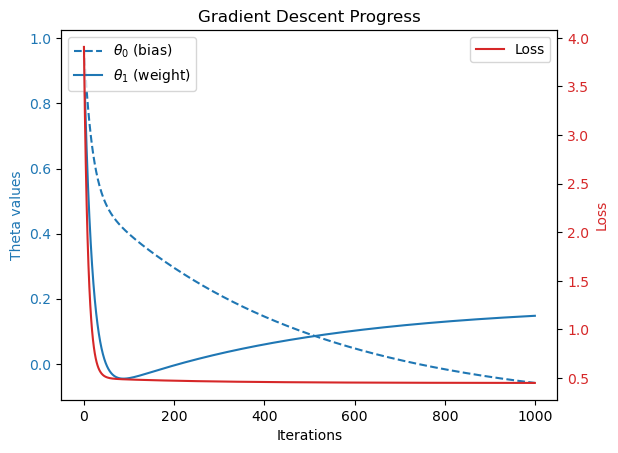

In [51]:
fig, ax1 = plt.subplots()

# Plot thetas
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_0$ (bias)', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_1$ (weight)', linestyle='-', color=color)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Theta values', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Plot loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(J_history, label='Loss', color=color)
ax2.set_ylabel('Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Gradient Descent Progress')
plt.show()


This plot shows the progress of gradient descent as it optimizes a linear regression model. 

**Key observations:**
- The loss decreases rapidly and then levels off: the model is learning and then converging.
- The parameters (bias theta, weight theta) are adjusting in response to the data.
- The fact that the thetas move in opposite directions for a while is normal; they’re each trying to minimize the loss based on their influence on the predictions.
- When the weight parameter climbs back up during gradient descent, it's usually due to the dynamics of the optimization process—specifically, how the algorithm steps through the "landscape" of the loss function (ex: learning rate and overshooting, shape of the loss surface, etc. The climbing back up of weight theta is a normal part of gradient descent, especially if the learning rate is on the higher side or the loss surface is not perfectly symmetric.)

**Summary:**  
THis is a successful gradient descent. The model is learning efficiently, the loss is dropping as expected, and the parameters are stabilizing.

In [62]:
# Step 1: Create a grid of theta values
theta0_vals = np.linspace(-3, 3, 100)
theta1_vals = np.linspace(-3, 3, 100)

# Step 2: Create a meshgrid (like coordinate matrices)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Step 3: Compute J (loss) for every (theta0, theta1) combo
J_vals = np.zeros(T0.shape)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[T0[i, j]], [T1[i, j]]])
        J_vals[i, j] = compute_cost(X, y, t)


In [64]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(
    title='Loss function for different thetas',
    autosize=True,
    width=600, height=600,
    scene=dict(
        xaxis_title='theta0',
        yaxis_title='theta1',
        zaxis_title='Loss'
    )
)
fig.show()


🧠 Loss Surface Visualization

This plot shows how the loss function (cost) behaves across different values of θ₀ and θ₁.

- The **lowest point** on the surface (the "bowl") represents the **best-fitting** parameters for our linear model.
- We use `meshgrid` to create all (θ₀, θ₁) combinations and compute the cost at each.
- It's helpful for visualizing gradient descent’s path — and how the algorithm finds the minimum.


In [67]:
line_marker = dict(color='#101010', width=2)

fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)

# Add the descent path
fig.add_scatter3d(
    x=theta1_history, 
    y=theta0_history, 
    z=J_history, 
    mode='lines+markers',
    line=line_marker,
    name='Gradient Descent Path'
)

fig.update_layout(
    title='Loss Function and Gradient Descent Path',
    autosize=True,
    width=600, height=600,
    scene=dict(
        xaxis_title='theta1',
        yaxis_title='theta0',
        zaxis_title='Loss'
    )
)

fig.show()


### ✨ Observations:
This 3D plot is a way to see gradient descent "walking down the bowl" step by step.

- 🟦 Blue surface = loss for all θ values
- ⚫ Black line = model's learning journey
- 🟡 Bottom of the valley = where the linear regression finds the optimal parameters!



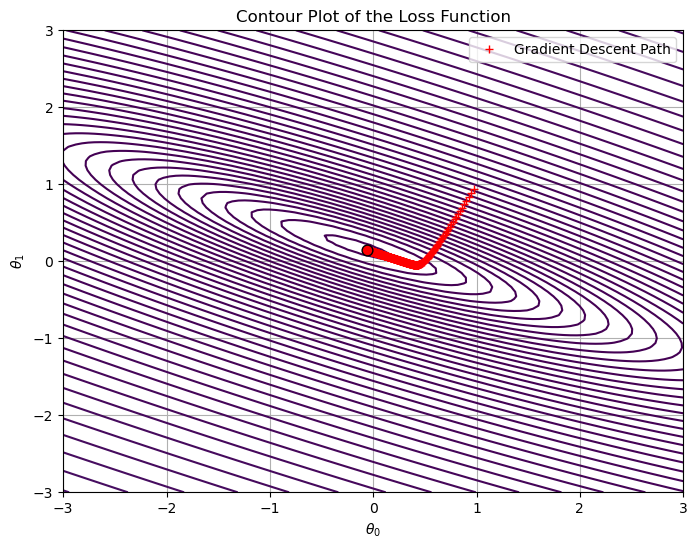

In [71]:
# Plot the 2D contour of the loss function surface with gradient descent path

# Contour plot of the cost function J(θ₀, θ₁)
plt.figure(figsize=(8, 6))
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 100), cmap='viridis')

# Add labels and title
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Contour Plot of the Loss Function')

# Overlay the path taken by gradient descent
plt.plot(theta0_history, theta1_history, 'r+', label='Gradient Descent Path')

# Optional: annotate final theta
plt.scatter(theta0_history[-1], theta1_history[-1], color='red', s=60, edgecolors='black', zorder=5)
plt.legend()

plt.grid(True)
plt.show()
